# Week4 - Lab

### Complete _todo_ parts in the following:

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [51]:
def create_df():
    df = pd.DataFrame()
    n = 10000
    x = np.linspace(0, 2*np.pi, n)
    y = 2*np.cosh(x/2) + np.random.normal(0, 3, n)

    x2 = random.choices(['A', 'B'], k=n)

    df['X1'] = x
    df['X2'] = x2
    df['y'] = [ y + 5 if b == 'A' else  y for y, b in zip(y, x2)]
    return df

df = create_df()

In [52]:
df.head()

,X1,X2,y
0,0.000000,A,6.810823
1,0.000628,B,2.806350
2,0.001257,B,4.587092
3,0.001885,A,7.658024
4,0.002514,A,2.459634


Text(0.5, 1.0, 'X1 vs y')

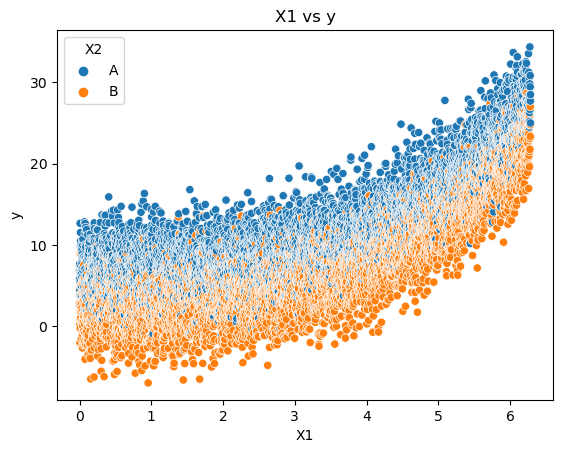

In [53]:
# todo: add a proper title

sns.scatterplot(data=df, x='X1', y='y', hue='X2')
plt.title('X1 vs y')

<Axes: title={'center': 'x1 vs y'}, xlabel='X1', ylabel='y'>

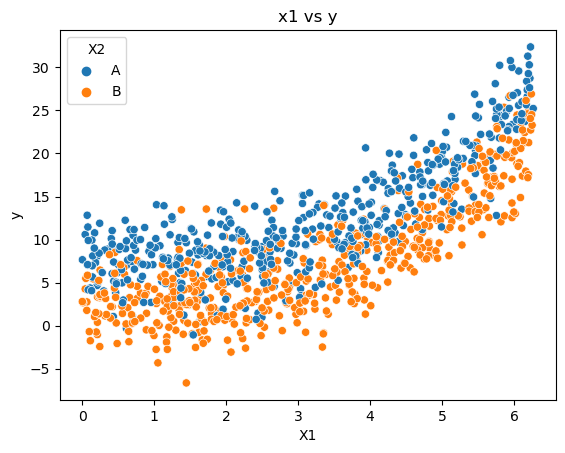

In [54]:
# todo: add the same title as above

plt.title('x1 vs y')
sns.scatterplot(data=df.sample(1000), x='X1', y='y', hue='X2')

#### Todo: 
explain findings in the graphs

- took a sample of 1000 random data points to see if the pattern is same and plotted the same graph as X1 vs y

In [55]:
X = df[['X1', 'X2']]
y = df.y

In [56]:
X.head()

,X1,X2
0,0.000000,A
1,0.000628,B
2,0.001257,B
3,0.001885,A
4,0.002514,A


In [57]:
model = LinearRegression()
model.fit(X[['X1']], y)

model.score(X[['X1']], y) 

0.5730243516299631

In [58]:
y_pred = model.predict(X[['X1']])
r2_score( y, y_pred)

0.5730243516299631

Text(0.5, 1.0, 'actual vs predicted')

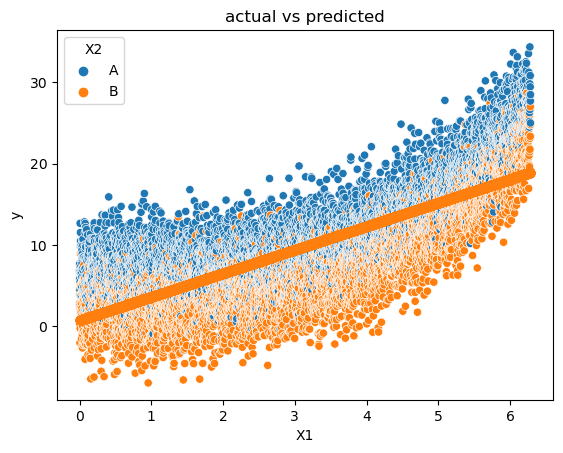

In [59]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X.X1, y) 
# plt.scatter(X.X1, y_pred)

# todo: add a proper title
sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)
plt.title('actual vs predicted')

Text(0.5, 1.0, 'predicted vs residual')

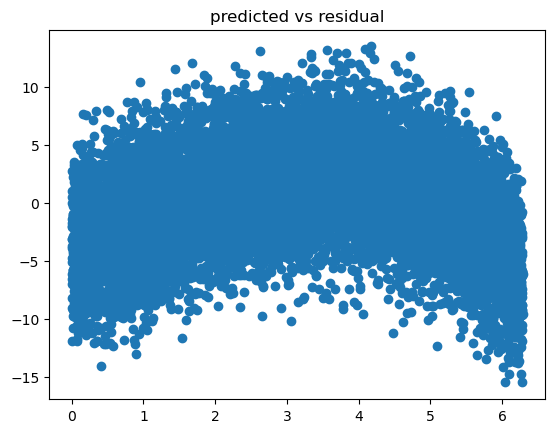

In [60]:
# todo: add a proper title

plt.scatter(X.X1, y_pred-y)
plt.title('predicted vs residual')

Text(0.5, 1.0, 'residual distribution')

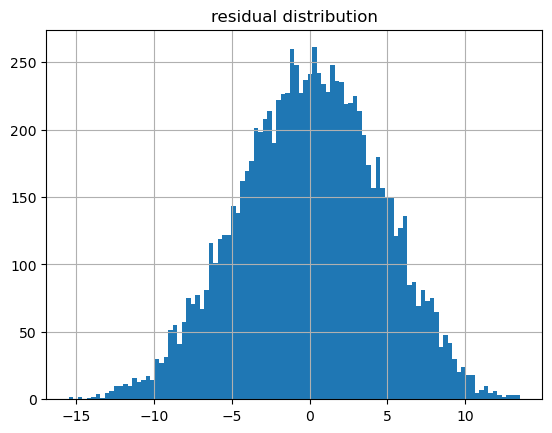

In [61]:
# todo: add a proper title

(y_pred-y).hist(bins=100)
plt.title('residual distribution')



- The model is not a good fit (r2 score is low) it can be better and this can be seen by the pattern in the residual plot so we can add dummy and get a better fit model.

In [62]:
# todo: explain the code below, what we do & why we do it? 

transform = PolynomialFeatures(degree=2)

X_data = transform.fit_transform(X[['X1']])

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y) 

0.6721630919702567

we added a dummy here and the r2 score looks to be improving

In [63]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.6721630919702567

Text(0.5, 1.0, 'actual vs predicted with dummy')

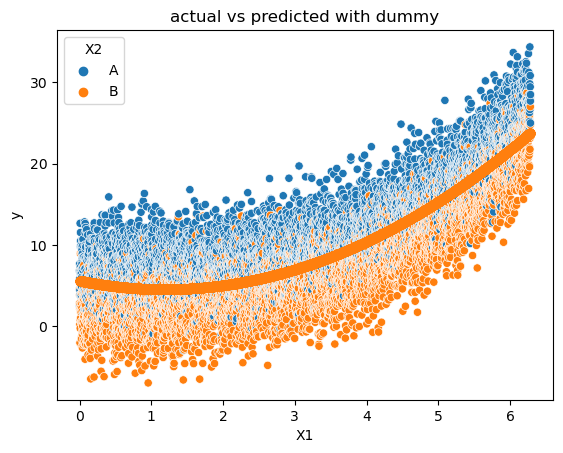

In [64]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X_data[:, 1], y)
# plt.scatter(X_data[:, 1], y_pred)


# todo: add a proper title

sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)
plt.title('actual vs predicted with dummy')

Text(0.5, 1.0, 'predicted vs residual with dummy')

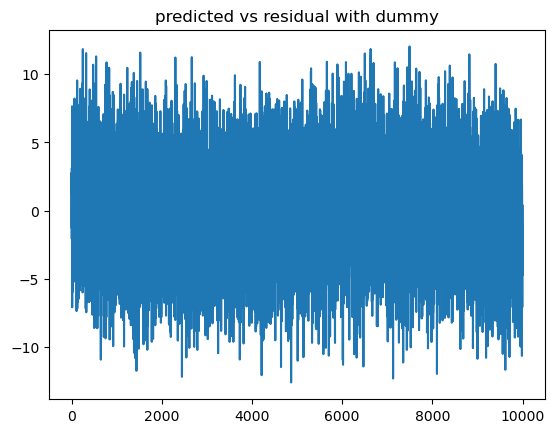

In [65]:
# todo: add a proper title

(y_pred-y).plot()
plt.title('predicted vs residual with dummy')

Text(0.5, 1.0, 'residual distribution')

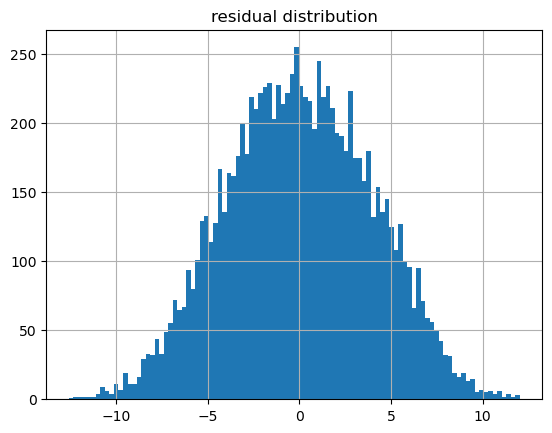

In [66]:
# todo: add a proper title

(y_pred-y).hist(bins=100)
plt.title('residual distribution')



- This is a bit better, r2 score improved and the tilt in the graph is better but this can still be improved further. we can see that there are two variables A and B so we can consider having two different lines to predict them.

##  Finally:

In [67]:
## to see the difference (leave these blocks commented when submitting)
# encoder = OneHotEncoder()

# categorical_features = ['X2']
# encoded = encoder.fit_transform(X[categorical_features])

# pd.DataFrame(
#     data=encoded.todense(), 
#     columns=encoder.get_feature_names_out()
# ).head()

In [68]:
encoder = OneHotEncoder(drop='first')

categorical_features = ['X2']
encoded = encoder.fit_transform(X[categorical_features])

In [69]:
encoded_df = pd.DataFrame(
    data=encoded.todense(), 
    columns=encoder.get_feature_names_out()
)

In [70]:
encoded_df.head()

,X2_B
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0


In [71]:
# todo: explain the code

numerical_features = ['X1']
X_new = X[numerical_features].join(encoded_df)
X_new.head()

,X1,X2_B
0,0.000000,0.0
1,0.000628,1.0
2,0.001257,1.0
3,0.001885,0.0
4,0.002514,0.0


did one hot encoding for a categorical feature and then used both the previous numerical feature and this encoded feature to get two predicted lines for a better fit model

In [72]:
# todo: explain the code

poly = PolynomialFeatures()
X_data = poly.fit_transform(X_new)

model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y) 

0.8063494510424329

this model is now a better fit than the previous one

In [73]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.8063494510424329

Text(0.5, 1.0, 'final actual vs predicted')

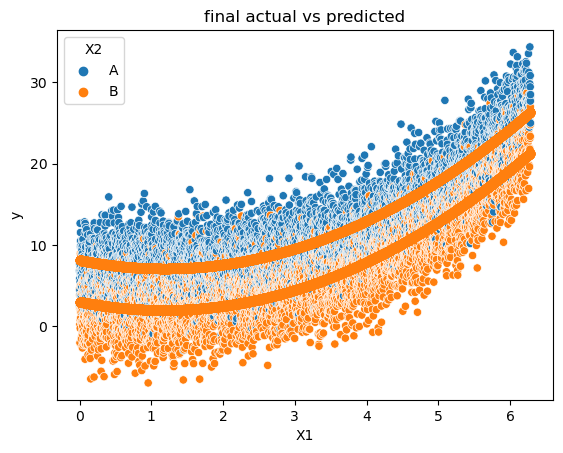

In [74]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X_new.X1, y)
# plt.scatter(X_new.X1, y_pred)

# todo: add a proper title

sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X_new.X1, y_pred)
plt.title('final actual vs predicted')

Text(0.5, 1.0, 'final predicted vs residual')

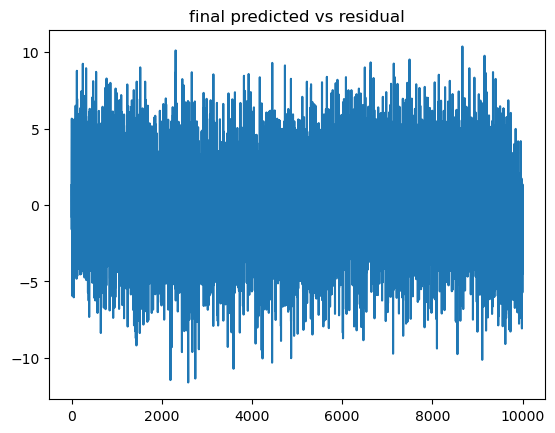

In [75]:
# todo: add a proper title

(y_pred-y).plot()
plt.title('final predicted vs residual')

Text(0.5, 1.0, 'final residual distribution')

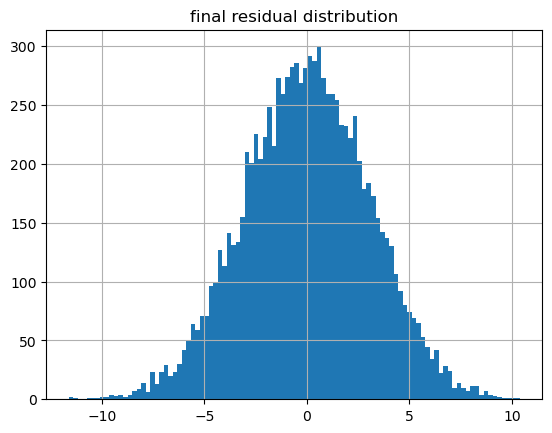

In [76]:
# todo: add a proper title

(y_pred-y).hist(bins=100)
plt.title('final residual distribution')



- This looks a much better model, the r2 score improved drastically with adding two different lines for prediction.

## Create a train-test split

In [86]:
X_training, X_test, y_training, y_test = train_test_split(X, y)


print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 7,500
Test samples: 2,500


 ## Train a linear regression model
  
 * Perform the model training on training set, follow the steps after `Finally` on the training set. 
 * Get the r2_score on the test set.
 
 Important note: When transforming use `transform` NOT `fit_transform` 
 
 __eg:__ `encoded = encoder.transform(X_test[categorical_features])`
     

In [89]:
X_training.head()

,X1,X2
9833,6.178874,A
917,0.576226,A
1990,1.250479,A
5695,3.578632,B
4952,3.111745,B


In [90]:
X_training2 = X_training.copy()

X_training2['isB'] = [1 if x == 'B' else 0 for x in X_training['X2']]
X_training2.drop('X2', axis = 1, inplace= True)
X_training2.head()

,X1,isB
9833,6.178874,0
917,0.576226,0
1990,1.250479,0
5695,3.578632,1
4952,3.111745,1


In [92]:
model = LinearRegression()
model.fit(X_training2, y_training)

X_test2 = X_test.copy()
X_test2['isB'] = [1 if x == 'B' else 0 for x in X_test['X2']]
X_test2.drop('X2', axis = 1, inplace= True)

model.score(X_test2, y_test)

0.71140660489875

## Create a pipeline

Add comments to `todo` parts

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

cat_vars = ['X2']
num_vars = ['X1']

# todo
num_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2))
])

# todo
cat_pipeline = Pipeline([
    ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# todo
processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pipeline, num_vars),
    ('cat pipeline', cat_pipeline, cat_vars)
])

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())
                             ])

print(modeling_pipeline)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])


In [94]:
modeling_pipeline.fit(X_training, y_training)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])

In [95]:
modeling_pipeline.score(X_test, y_test)

0.8113958026412825

## Evaluate/create residual plots

In [96]:
y_pred = modeling_pipeline.predict(X_test)

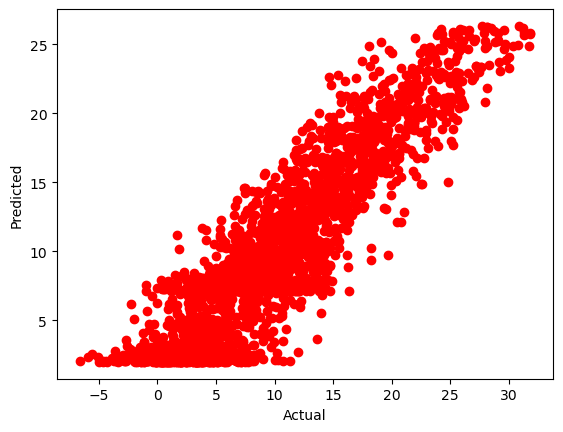

In [99]:
import matplotlib.pyplot as plt

plt.plot(y_test, y_pred, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

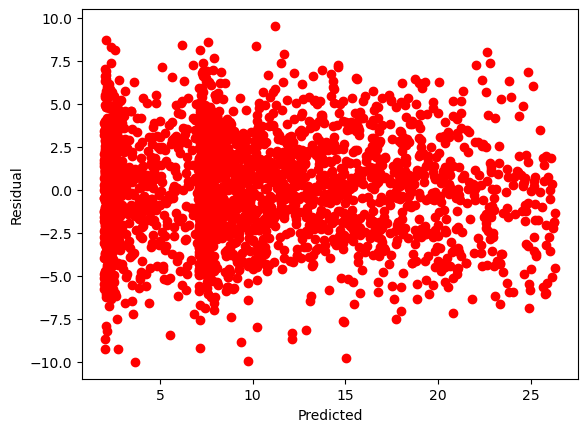

In [100]:
plt.plot(y_pred, y_pred - y_test, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()

## Explain findings

This isn't a perfect model so the data points are scattered away from 0